# Polarized Light (by Wolfram Language)

#### define the `polar` function

In [1]:
polar[t_][δA_,δC_][θ_][showComponent_,showVector_][azimuthal_,elevation_] := Module[
    {
        Ae, Ao,
        δB,
        e, o,
        table,
        xrange = 15, plotColor = ColorData[68,"ColorList"],
        componentPlot, wavePlot, vectorPlot, fig
    },
    
    (* amplitudes of e/o polarizations *)
    Ae = Cos[θ Degree];
    Ao = Sin[θ Degree];
    (* phase differences *)
    δB = δA + δC;
    
    (* components of waves *)
    e[x_][δ_] := Ae Sin[x - t - δ];
    o[x_]     := Ao Sin[x - t    ];
    
    (* table of parameters *)
    table = Column@{
        Row@{"θ=",ArcTan[Subscript["A","o"]/Subscript["A","e"]],"=",θ,"°"},
        Row@{
            Subscript["δ","A"],"=",δA, Spacer@20,
            Subscript["δ","C"],"=",δC, Spacer@20,
            Subscript["δ","B"],"=",δB
        }
    };
    
    (* plot of component waves *)
    componentPlot[δ_][range_,color_] := ParametricPlot3D[
        {
            {x, e[x][δ], 0   },
            {x, 0      , o[x]}
        },
        {x,range[[1]],range[[2]]},
        PlotStyle->Directive[color,Thickness@Small,Dashed]
    ];
    (* plot of wave *)
    wavePlot[δ_][range_,color_] := ParametricPlot3D[
        {x, e[x][δ], o[x]},
        {x,range[[1]],range[[2]]},
        PlotStyle->{color,Thickness@Large}
    ];
    (* plot of vector field *)
    vectorPlot[δ_][range_,color_] := Graphics3D@{
        color,Thickness@Tiny,
        Line@Table[
            {{x, e[x][δ], o[x]}, {x,0,0}},
            {x,range[[1]]+0.2,range[[2]],0.5}
        ]
    };
    (* combine the plots into a single figure *)
    fig = Show[
        {
            Graphics3D@{
                Thickness@Small,Gray,
                (* polarizer *)
                Line@{ {{0,-1.5,0},{0,1.5,0}}, {{0,0,-1.5},{0,0,1.5}} },
                Dashed,
                Line@{
                    (* x axis *)
                    {{-xrange,0,0},{xrange,0,0}},
                    (* frames at the ends of the two waves *)
                    {{-xrange,-1.5,0},{-xrange,1.5,0}}, {{-xrange,0,-1.5},{-xrange,0,1.5}},
                    {{ xrange,-1.5,0},{ xrange,1.5,0}}, {{ xrange,0,-1.5},{ xrange,0,1.5}}
                },
                (* endpoints of the two waves *)
                PointSize[Large],
                plotColor[[1]], Point@{-xrange,e[-xrange][δA],o[-xrange]},
                plotColor[[2]], Point@{ xrange,e[ xrange][δB],o[ xrange]}
            },
            (* waves *)
            wavePlot[δA][{-xrange,0},plotColor[[1]] ],
            wavePlot[δB][{0, xrange},plotColor[[2]] ],
            (* component waves *)
            If[showComponent,
                {
                    componentPlot[δA][{-xrange,0},plotColor[[1]] ],
                    componentPlot[δB][{0, xrange},plotColor[[2]] ]
                },
                Nothing
            ],
            (* vector fields *)
            If[showVector,
                {
                    vectorPlot[δA][{-xrange,0},plotColor[[1]] ],
                    vectorPlot[δB][{0, xrange},plotColor[[2]] ]
                },
                Nothing
            ]
        },
        PlotRange->{{-xrange,xrange},{-2,2},{-2,2}}, BoxRatios->{1,1,1},
        Axes->True, AxesLabel->{"","extraordinary","ordinary"},
        ViewPoint->CoordinateTransform["Spherical"->"Cartesian",
            {10,(90-elevation)Degree,(azimuthal-90)Degree}],
        ImageSize->Medium
    ];
    
    (* return *)
    Column@{ table, fig }
];

#### plot a static figure

A
          o
θ=ArcTan[--]=45°
         A
          e
                 Pi             Pi
δ =0Spacer[20]δ =--Spacer[20]δ =--
 A             C 2            B 2
-Graphics3D-
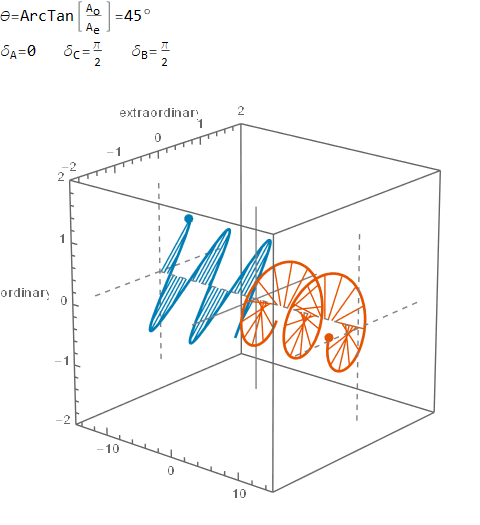

In [2]:
polar[3Pi/4][0,Pi/2][45][False,True][40,20]

#### create an animation (export a GIF file)

In [ ]:
Export["polar.gif",
    Table[
        polar[t][0,Pi/2][45][False,False][40,20],
        {t,0,2Pi,0.1}
    ],
    ImageResolution->96,
    "DisplayDurations"->1/15, AnimationRepetitions->Infinity
]

#### create an interactive interface (export a CDF file)

In [ ]:
Export[
    FileNameJoin@{Directory[],"polar.cdf"},
    Notebook[{Cell[BoxData@ToBoxes@#,"Output"]}, WindowSize->All],
    "CDF"
]& @
Manipulate[
    polar[t][δA,δC][θ][showComponent,showVector][40,20],
    
    {{θ , 90, "θ (deg)"         }, 0,90,15    },
    {{δA, 0 , Subscript["δ","A"]}, -Pi,Pi,Pi/8},
    {{δC, 0 , Subscript["δ","C"]}, -Pi,Pi,Pi/8},
    {{showComponent, True, "show components"}, {True,False}},
    {{showVector   , True, "show vectors"   }, {True,False}},
    {{t, 0, "t"}, 0,2Pi, Animator,
        AnimationRepetitions->Infinity, AnimationRunning->False},
    TrackedSymbols->{θ,δA,δC, showComponent,showVector, t},
    
    ControlPlacement->Right,
    SaveDefinitions->True
]